Prophet time series model

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

def prophet_model(dataset):
  data=pd.read_csv(dataset)
  data.drop(columns=data.columns[0], axis=1, inplace=True)
  data.columns=['Date','Value']
  data.fillna(data.mean(),inplace=True)

  data = data.rename(columns={'Date': 'ds', 'Value': 'y'})

  train_size = int(0.8 * len(data))
  train_data, test_data = data[:train_size], data[train_size:]

  model = Prophet()
  model.fit(train_data)

  future = model.make_future_dataframe(periods=len(test_data))
  forecast = model.predict(future)

  predictions = forecast['yhat'][-len(test_data):]

  actual_sales = test_data['y']

  mape_prophet = mean_absolute_percentage_error(actual_sales, predictions)
  print(f"MAPE for Prophet: {mape_prophet:.2f}")
  return mape_prophet




ARIMA time series model

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

def arima_model(dataset):
  data=pd.read_csv(dataset)
  data.drop(columns=data.columns[0], axis=1, inplace=True)
  data.columns=['Date','Sales']
  data.fillna(data.mean(),inplace=True)

  data['Date'] = pd.to_datetime(data['Date'])

  data = data.rename(columns={'Date': 'ds', 'Sales': 'y'})

  train_size = int(0.8 * len(data))
  train_data, test_data = data[:train_size], data[train_size:]

  p, d, q = 1, 1, 1
  model = ARIMA(train_data['y'], order=(p, d, q))
  model_fit = model.fit()

  start = len(train_data)
  end = len(train_data) + len(test_data) - 1
  predictions = model_fit.predict(start=start, end=end, dynamic=False, typ='levels')

  actual_sales = test_data['y']

  mape_arima = mean_absolute_percentage_error(actual_sales, predictions)
  print(f"MAPE for ARIMA: {mape_arima:.2f}")
  return mape_arima


XGboost time series model

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error

def xgboost_model(dataset):
  data=pd.read_csv(dataset)
  data.drop(columns=data.columns[0], axis=1, inplace=True)
  data.columns=['Date','Value']
  data.fillna(data.mean(),inplace=True)


  data['Date'] = pd.to_datetime(data['Date'])

  data['Year'] = data['Date'].dt.year
  data['Month'] = data['Date'].dt.month

  data = data.drop('Date', axis=1)

  train_size = int(0.8 * len(data))
  train_data, test_data = data[:train_size], data[train_size:]

  X_train, y_train = train_data.drop('Value', axis=1), train_data['Value']
  X_test, y_test = test_data.drop('Value', axis=1), test_data['Value']


  model = xgb.XGBRegressor()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  mape_xgboost = mean_absolute_percentage_error(y_test, predictions)
  print(f"MAPE for XGBoost: {mape_xgboost:.2f}")
  return mape_xgboost

Classifier to classify the model based on mape value

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

arima_mape_values,xgboost_mape_values,prophet_mape_values=[],[],[]

csv_list=['sample_1.csv','sample_7.csv','sample_10.csv','sample_8.csv']

arima_val,xgboost_val,prophet_val=0,0,0
for file in csv_list:
  arima_val=arima_model(file)
  arima_mape_values.append(arima_val)

  xgboost_val=xgboost_model(file)
  xgboost_mape_values.append(xgboost_val)

  prophet_val=prophet_model(file)
  prophet_mape_values.append(prophet_val)


a = {"1":arima_mape_values, "2":xgboost_mape_values, "3":prophet_mape_values}
data = pd.DataFrame.from_dict(a, orient='index')

"""data = pd.DataFrame({
    'MAPE_ARIMA': arima_mape_values,
    'MAPE_xgboost': xgboost_mape_values,
    'MAPE_Prophet': prophet_mape_values,
    'Model': [0, 1, 2]
})"""

X = data.iloc[:,:].values
y=  data.index.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


print(X_test,y_test,y_train)

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("So the classifier predicts the model "+y_pred+" as best model (1-arima/2-xgboost/3-prophet)")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for ARIMA: 0.04
MAPE for XGBoost: 0.05


DEBUG:cmdstanpy:input tempfile: /tmp/tmp47_f2iqm/dw2pmuzd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp47_f2iqm/en8eywwq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51338', 'data', 'file=/tmp/tmp47_f2iqm/dw2pmuzd.json', 'init=/tmp/tmp47_f2iqm/en8eywwq.json', 'output', 'file=/tmp/tmp47_f2iqm/prophet_modelx4b3ar2i/prophet_model-20231107105708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:57:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:57:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAPE for Prophet: 0.05


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for ARIMA: 54.17
MAPE for XGBoost: 7.18


DEBUG:cmdstanpy:input tempfile: /tmp/tmp47_f2iqm/3y4qgfwy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp47_f2iqm/3iw34n_u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93371', 'data', 'file=/tmp/tmp47_f2iqm/3y4qgfwy.json', 'init=/tmp/tmp47_f2iqm/3iw34n_u.json', 'output', 'file=/tmp/tmp47_f2iqm/prophet_modelalylm9fw/prophet_model-20231107105709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:57:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:57:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAPE for Prophet: 40.36


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp47_f2iqm/9r1wq25t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp47_f2iqm/lg623llg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68648', 'data', 'file=/tmp/tmp47_f2iqm/9r1wq25t.json', 'init=/tmp/tmp47_f2iqm/lg623llg.json', 'output', 'file=/tmp/tmp47_f2iqm/prophet_modeln_4zgg6k/prophet_model-20231107105710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:57:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAPE for ARIMA: 4983.20
MAPE for XGBoost: 4948.49


10:57:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAPE for Prophet: 6840.37


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp47_f2iqm/_ktjkw7y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp47_f2iqm/8v5i5a1_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34', 'data', 'file=/tmp/tmp47_f2iqm/_ktjkw7y.json', 'init=/tmp/tmp47_f2iqm/8v5i5a1_.json', 'output', 'file=/tmp/tmp47_f2iqm/prophet_models61ep6gb/prophet_model-20231107105711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


MAPE for ARIMA: 0.33
MAPE for XGBoost: 0.42


10:57:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:57:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAPE for Prophet: 0.22
[[4.47528453e-02 5.41720066e+01 4.98319877e+03 3.30529164e-01]] ['1'] ['2' '3']
['So the classifier predicts the model 2 as best model (1-arima/2-xgboost/3-prophet)']


XGboost for time series model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [ ]:
df=pd.read_csv("PJME_hourly.csv")
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
print(df)

                     PJME_MW
Datetime                    
2002-12-31 01:00:00  26498.0
2002-12-31 02:00:00  25147.0
2002-12-31 03:00:00  24574.0
2002-12-31 04:00:00  24393.0
2002-12-31 05:00:00  24860.0
...                      ...
2018-01-01 20:00:00  44284.0
2018-01-01 21:00:00  43751.0
2018-01-01 22:00:00  42402.0
2018-01-01 23:00:00  40164.0
2018-01-02 00:00:00  38608.0

[145366 rows x 1 columns]


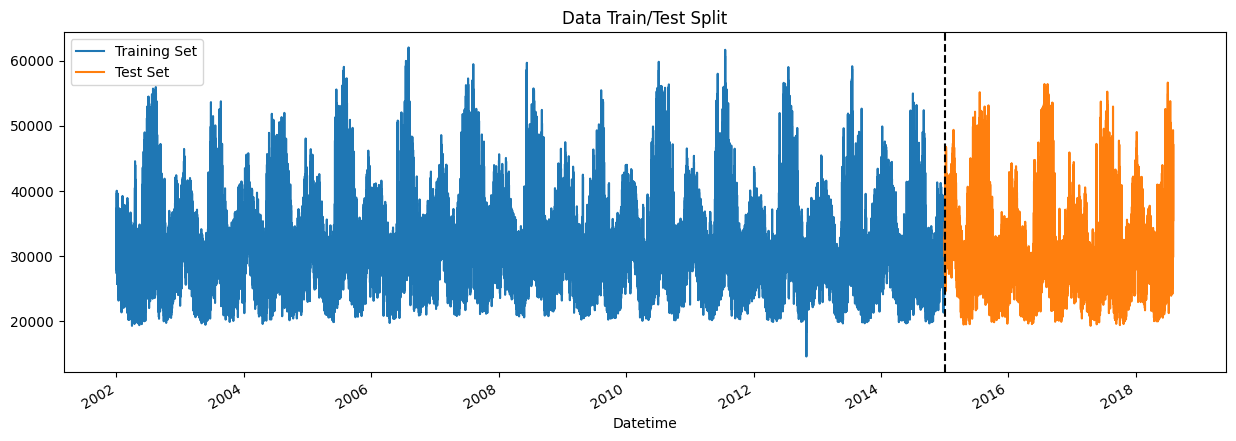

In [ ]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']


fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

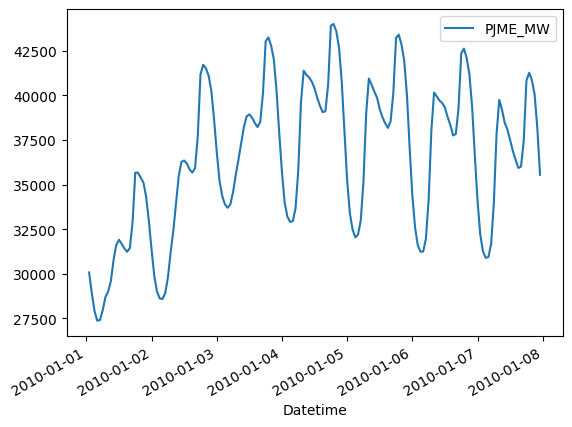

In [ ]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot()

def feature_selection(df):
  df['hour']=df.index.hour
  df['dayofweek']=df.index.day_of_week
  df['quarter']=df.index.quarter
  df['month']=df.index.month
  df['year']=df.index.year
  df['dayofyear']=df.index.day_of_year
  return df

df = feature_selection(df)

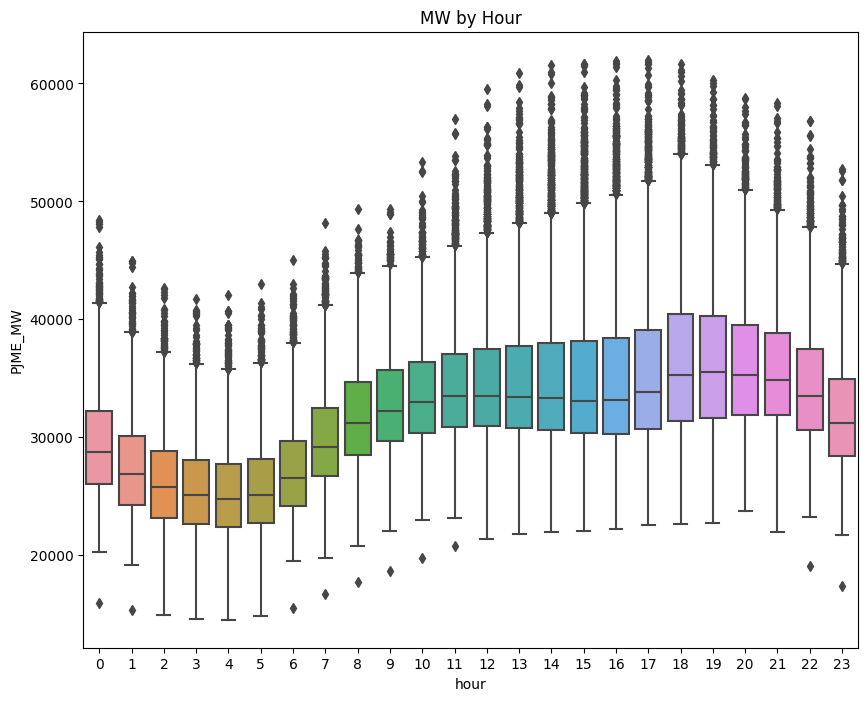

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()

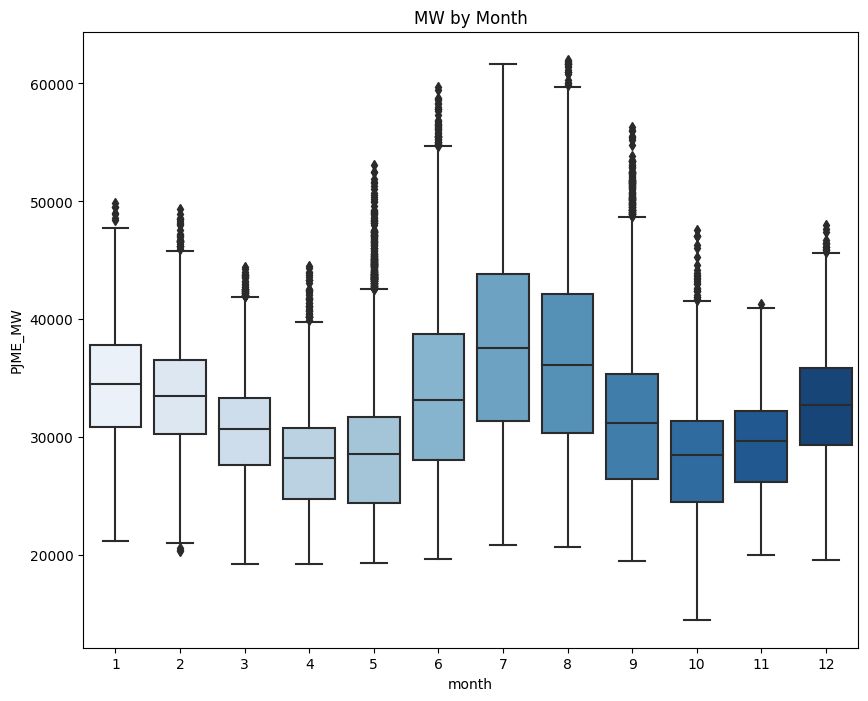

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')
ax.set_title('MW by Month')
plt.show()

In [ ]:
train = feature_selection(train)
test = feature_selection(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'PJME_MW'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:32605.13970	validation_1-rmse:31657.15729
[100]	validation_0-rmse:12584.35462	validation_1-rmse:11747.28803
[200]	validation_0-rmse:5837.33066	validation_1-rmse:5363.58554
[300]	validation_0-rmse:3923.28511	validation_1-rmse:4020.48045
[400]	validation_0-rmse:3447.54638	validation_1-rmse:3860.60088
[500]	validation_0-rmse:3288.19208	validation_1-rmse:3816.37862
[600]	validation_0-rmse:3206.55619	validation_1-rmse:3779.04119
[700]	validation_0-rmse:3153.61368	validation_1-rmse:3754.45684
[800]	validation_0-rmse:3114.34038	validation_1-rmse:3738.38209
[900]	validation_0-rmse:3084.39550	validation_1-rmse:3730.01893
[989]	validation_0-rmse:3059.85847	validation_1-rmse:3727.94591


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

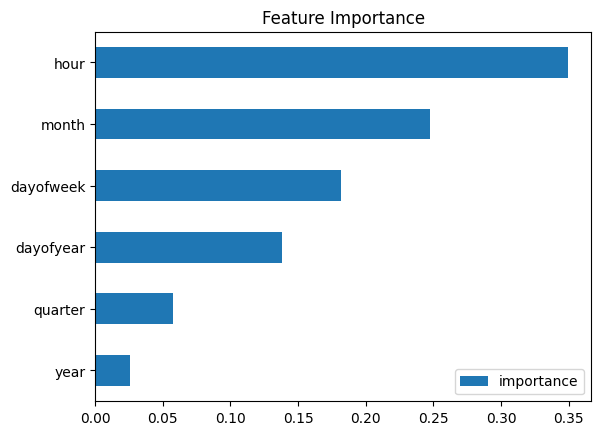

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

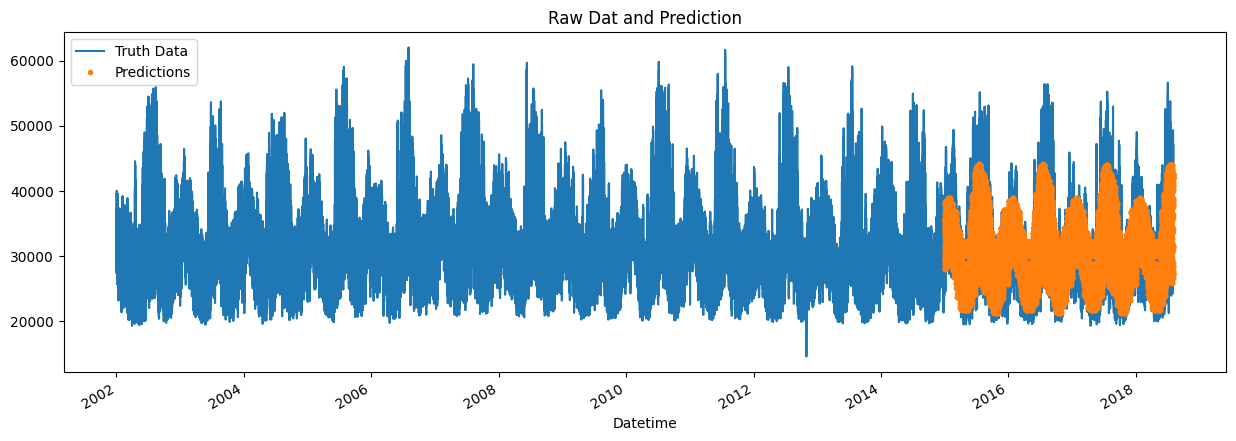

In [ ]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

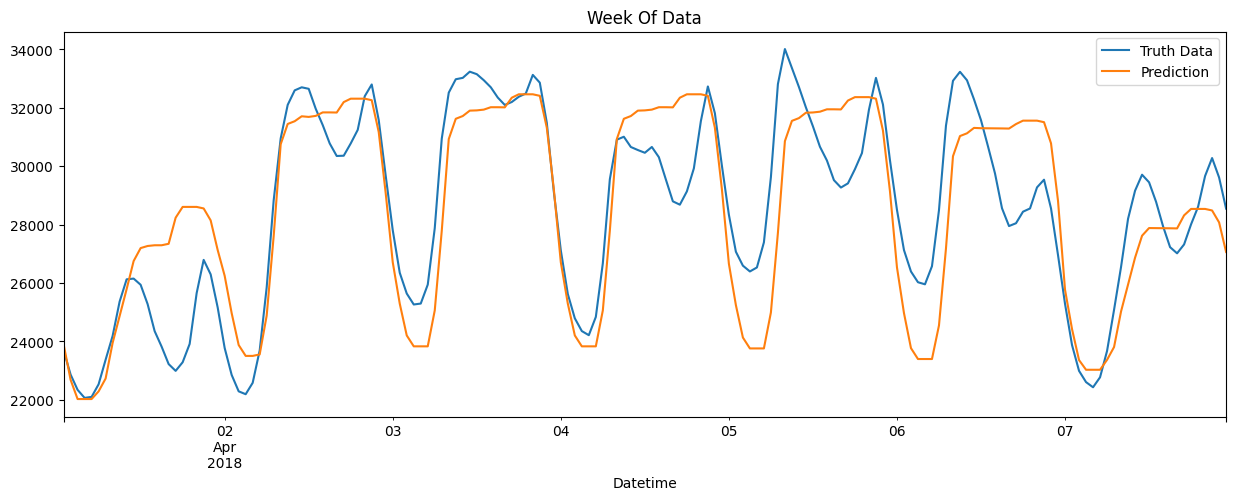

In [ ]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'].plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'].plot()
plt.legend(['Truth Data','Prediction'])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
score = mean_absolute_percentage_error(test['PJME_MW'], test['prediction'])
print(f'MAPE Score on Test set: {score:0.2f}')

MAPE Score on Test set: 0.09
